#### 선형회귀 모델 구현

In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### [1] 데이터 준비

In [10]:
# y = 3 * x + 2 대응하는 데이터 임의로 생성
import numpy as np

In [11]:
X = np.arange(1, 10)

In [12]:
y = 3 * X + 2

In [6]:
X

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
y

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29])

In [8]:
# 시각화로 데이터 분포 확인
import matplotlib.pyplot as plt

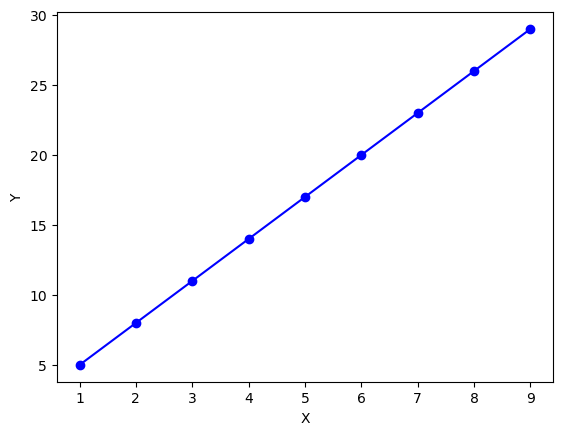

In [9]:
plt.plot(X, y, 'bo-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### [2] 모델 구현
- 모델 설계
- 모델 생성
- 학습
- 평가

[2-1] 모델 설계 => 층 설정, 입력, 출력

In [4]:
lrModel = Sequential()

In [5]:
lrModel.add(Dense(1, input_shape=(1,)))

# w matrix => 1 X 1, b 벡터 => 1

In [6]:
# 설계한 모델 요약 정보 확인
lrModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


##### [2-2] 모델 생성 => 최적화방법, 오차계산 함수, 평가지표설정
- 케라스에서는 최적화, 손실함수, 평가지표를 문자열과 실제 함수/클래스와 맵핑되어 있음
- tensorflow.keras.optimizer.AdamOptimizer
- tensorflow.keras.losses.mean_squared_error
- tensorflow.keras.metrics.mean_squared_error

🔹기본값 최적화 적용

In [7]:
lrModel.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

🔹사용자 설정 최적화 적용

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
my_adam = Adam(learning_rate=0.0005)

In [ ]:
lrModel.compile(optimizer=my_adam, loss='mse', metrics=['mse', 'mae'])

##### [3] 학습
- 매개변수 : 학습횟수, 검증데이터 설정, 학습중단설정, 학습과정출력여부
- 반환값 : History 객체에 학습과정의 평가결과를 저장해서 반환

In [13]:
result = lrModel.fit(X, y, epochs=10, validation_split=0.1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 282.7994 - mse: 282.7994 - mae: 15.3758 - val_loss: 826.0782 - val_mse: 826.0782 - val_mae: 28.7416
Epoch 2/10
1/1 [==============================] - 0s 119ms/step - loss: 282.5991 - mse: 282.5991 - mae: 15.3703 - val_loss: 825.5035 - val_mse: 825.5035 - val_mae: 28.7316
Epoch 3/10
1/1 [==============================] - 0s 238ms/step - loss: 282.3989 - mse: 282.3989 - mae: 15.3648 - val_loss: 824.9290 - val_mse: 824.9290 - val_mae: 28.7216
Epoch 4/10
1/1 [==============================] - 0s 80ms/step - loss: 282.1987 - mse: 282.1987 - mae: 15.3593 - val_loss: 824.3547 - val_mse: 824.3547 - val_mae: 28.7116
Epoch 5/10
1/1 [==============================] - 0s 65ms/step - loss: 281.9986 - mse: 281.9986 - mae: 15.3538 - val_loss: 823.7806 - val_mse: 823.7806 - val_mae: 28.7016
Epoch 6/10
1/1 [==============================] - 0s 70ms/step - loss: 281.7986 - mse: 281.7986 - mae: 15.3483 - val_loss: 823.2067 - val_mse: 82

In [14]:
type(result)

keras.callbacks.History

In [15]:
result.history

{'loss': [282.79937744140625,
  282.59912109375,
  282.39886474609375,
  282.19866943359375,
  281.99859619140625,
  281.798583984375,
  281.5986328125,
  281.3988037109375,
  281.19903564453125,
  280.9993591308594],
 'mse': [282.79937744140625,
  282.59912109375,
  282.39886474609375,
  282.19866943359375,
  281.99859619140625,
  281.798583984375,
  281.5986328125,
  281.3988037109375,
  281.19903564453125,
  280.9993591308594],
 'mae': [15.375788688659668,
  15.370288848876953,
  15.364788055419922,
  15.359288215637207,
  15.353788375854492,
  15.348288536071777,
  15.342789649963379,
  15.337291717529297,
  15.331792831420898,
  15.3262939453125],
 'val_loss': [826.0782470703125,
  825.5035400390625,
  824.928955078125,
  824.354736328125,
  823.7805786132812,
  823.2067260742188,
  822.6331176757812,
  822.0596923828125,
  821.4864501953125,
  820.9135131835938],
 'val_mse': [826.0782470703125,
  825.5035400390625,
  824.928955078125,
  824.354736328125,
  823.7805786132812,
  82

[3-2] 학습 후 반환값 History로 확인

In [16]:
import matplotlib.pyplot as plt

In [17]:
np.round(result.history['loss'], 3)

array([282.799, 282.599, 282.399, 282.199, 281.999, 281.799, 281.599,
       281.399, 281.199, 280.999])

In [18]:
plt.plot(np.round(result.history['loss'], 3), 'bo-')
plt.plot(np.round(result.history['val_loss'], 3), 'ro-')
plt.show()

: 

: 

##### [4] 평가

In [1]:
lrModel.evaluate(X, y)

NameError: name 'lrModel' is not defined

##### [5] 예측

In [ ]:
lrModel.predict([4])